In [11]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
df=pd.read_csv("/Users/prathmeshyadav/Desktop/Full Stack Project/dataset_heart (2).csv")
df

,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal,heart disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,1
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,1
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,1
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,1


In [ ]:
# Fix potential issues with column names
df.columns = df.columns.str.strip()  # Remove extra spaces


In [13]:
top_features = [
    'age', 
    'resting blood pressure', 
    'thal', 
    'major vessels', 
    'chest pain type', 
    'oldpeak', 
    'serum cholestoral', 
    'max heart rate', 
    'sex ' 
]

# Create a new dataset with selected features
X = df[top_features]
y = df['heart disease']  # Replace with your actual target variable

# Ensure the target variable is scaled between 0 and 1


  # Flatten to 1D

In [14]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(f"Training Set: {X_train.shape}, Test Set: {X_test.shape}")

Training Set: (202, 9), Test Set: (68, 9)


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate and print classification metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.8235294117647058
Confusion Matrix:
[[37  3]
 [ 9 19]]


Accuracy: 0.8235294117647058


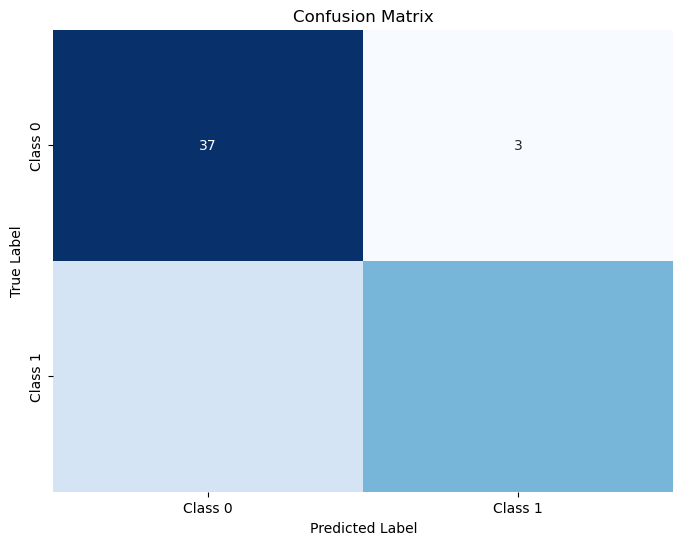

In [16]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("Confusion Matrix")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, confusion_matrix, roc_auc_score, roc_curve)

In [18]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC: {roc_auc}")

Accuracy: 0.8235294117647058
Precision: 0.8636363636363636
Recall: 0.6785714285714286
F1 Score: 0.76
ROC AUC: 0.8017857142857143


In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid Search with Cross-Validation for Classification
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), 
                           param_grid=param_grid, 
                           cv=5, 
                           scoring='accuracy',  # Use 'accuracy' for classification
                           verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)

# Train the model with the best parameters
best_rf = grid_search.best_estimator_

# Predict on the test set
y_pred_best = best_rf.predict(X_test)

# Optionally, print out classification metrics
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy of Best Model:", accuracy_score(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END m

In [20]:
from sklearn.preprocessing import StandardScaler
import joblib

# Example scaler (used during training)
scaler_X = StandardScaler()
scaler_X.fit(X_train)  # Fit on training data
joblib.dump(scaler_X, "scaler_X.pkl")  # Save to a file

['scaler_X.pkl']

In [21]:
import joblib

# Load the saved scaler
scaler_X = joblib.load("scaler_X.pkl")

In [22]:
import joblib
from sklearn.ensemble import RandomForestRegressor

# Example: Training a Random Forest model
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)

# Save the trained model
joblib.dump(rf_regressor, "rf_regressor.pkl")

['rf_regressor.pkl']

In [23]:
import joblib

# Load the trained Random Forest model
rf_regressor = joblib.load("rf_regressor.pkl")

In [24]:
from sklearn.preprocessing import MinMaxScaler
import joblib

# Example: Scaling target variable
scaler_y = MinMaxScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))

# Save the scaler
joblib.dump(scaler_y, "scaler_y.pkl")

['scaler_y.pkl']

In [25]:
import pandas as pd
import joblib
import numpy as np

def get_user_input():
    input_data = {}

    try:
        input_data['age'] = int(input("Enter age (years): "))
        input_data['resting blood pressure'] = int(input("Enter resting blood pressure (mm Hg): "))
        input_data['thal'] = int(input("Enter Thal value (1: Normal, 2: Fixed Defect, 3: Reversible Defect): "))
        input_data['major vessels'] = int(input("Enter number of major vessels colored (0-3): "))
        input_data['chest pain type'] = int(input("Enter chest pain type (1: Typical Angina, 2: Atypical Angina, 3: Non-Anginal Pain, 4: Asymptomatic): "))
        input_data['oldpeak'] = float(input("Enter Oldpeak value (ST depression induced by exercise): "))
        input_data['serum cholestoral'] = int(input("Enter serum cholesterol (mg/dL): "))
        input_data['max heart rate'] = int(input("Enter max heart rate achieved (bpm): "))
        input_data['sex'] = int(input("Enter sex (1: Male, 0: Female): "))

        print("\nInput Data Collected:")
        for key, value in input_data.items():
            print(f"{key}: {value}")

        return input_data

    except ValueError:
        print("Invalid input. Please enter the correct data type for each field.")
        return None

if __name__ == "__main__":
    try:
        # Load pre-trained scaler and model
        scaler_X = joblib.load("scaler_X.pkl")
        rf_regressor = joblib.load("rf_regressor.pkl")

        # Collect user input
        user_data = get_user_input()

        if user_data:
            # Create DataFrame from user input
            input_df = pd.DataFrame([user_data])

            # Correct the feature names to match the training data
            correct_feature_names = [
                "age",
                "resting blood pressure",
                "thal",
                "major vessels",
                "chest pain type",
                "oldpeak",
                "serum cholestoral",
                "max heart rate",
                "sex "  # Note the space after "sex"
            ]
            input_df.columns = correct_feature_names

            # Scale input data
            input_scaled = scaler_X.transform(input_df)

            # Predict scaled value
            y_pred_input_scaled = rf_regressor.predict(input_scaled)

            # Display prediction
            print(f"\nPredicted heart disease probability (scaled value): {y_pred_input_scaled[0]:.2f}")

    except FileNotFoundError as e:
        print(f"Error: {e}. Ensure that the scaler and model files exist and are correctly loaded.")
    except Exception as e:
        print(f"Error during prediction: {e}")

Invalid input. Please enter the correct data type for each field.
